Iteration 1, Best Fitness: 1650.992223091356
Iteration 2, Best Fitness: 1100.0
Iteration 3, Best Fitness: 1100.0
Iteration 4, Best Fitness: 1100.0
Iteration 5, Best Fitness: 1100.0
Iteration 6, Best Fitness: 1100.0
Iteration 7, Best Fitness: 1100.0
Iteration 8, Best Fitness: 1100.0
Iteration 9, Best Fitness: 1100.0
Iteration 10, Best Fitness: 1100.0
Iteration 11, Best Fitness: 1100.0
Iteration 12, Best Fitness: 1100.0
Iteration 13, Best Fitness: 1100.0
Iteration 14, Best Fitness: 1100.0
Iteration 15, Best Fitness: 1100.0
Iteration 16, Best Fitness: 1100.0
Iteration 17, Best Fitness: 1100.0
Iteration 18, Best Fitness: 1100.0
Iteration 19, Best Fitness: 1100.0
Iteration 20, Best Fitness: 1100.0
Iteration 21, Best Fitness: 1100.0
Iteration 22, Best Fitness: 1100.0
Iteration 23, Best Fitness: 1100.0
Iteration 24, Best Fitness: 1100.0
Iteration 25, Best Fitness: 1100.0
Iteration 26, Best Fitness: 1100.0
Iteration 27, Best Fitness: 1100.0
Iteration 28, Best Fitness: 1100.0
Iteration 29, Best

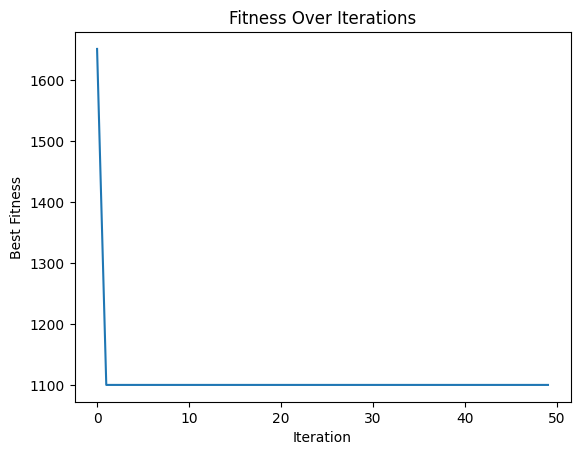

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the fitness function
def fitness_function(signal_timings, traffic_data):
    """
    Calculate fitness as the total waiting time based on signal timings and traffic data.
    Lower fitness is better (minimize waiting time).
    """
    # Example: Simulated waiting time = traffic density * red light time
    # traffic_data = [vehicles in direction A, B, C, D]
    total_waiting_time = 0
    for i in range(len(signal_timings)):
        total_waiting_time += traffic_data[i] * signal_timings[i]
    return total_waiting_time

# Initialize particles
def initialize_particles(num_particles, num_directions, bounds):
    """
    Initialize positions and velocities of particles.
    """
    positions = np.random.uniform(bounds[0], bounds[1], (num_particles, num_directions))
    velocities = np.random.uniform(-1, 1, (num_particles, num_directions))
    return positions, velocities

# Update velocity
def update_velocity(velocity, position, p_best, g_best, w, c1, c2):
    """
    Update the velocity of a particle.
    """
    r1, r2 = np.random.rand(), np.random.rand()
    inertia = w * velocity
    cognitive = c1 * r1 * (p_best - position)
    social = c2 * r2 * (g_best - position)
    return inertia + cognitive + social

# Update position
def update_position(position, velocity, bounds):
    """
    Update the position of a particle, ensuring it stays within bounds.
    """
    new_position = position + velocity
    new_position = np.clip(new_position, bounds[0], bounds[1])
    return new_position

# PSO Main Function
def particle_swarm_optimization(traffic_data, num_particles=30, num_iterations=50, num_directions=4, bounds=(10, 60)):
    """
    Perform Particle Swarm Optimization to optimize traffic signal timings.
    """
    # Initialize particles
    positions, velocities = initialize_particles(num_particles, num_directions, bounds)
    p_best_positions = positions.copy()
    p_best_scores = np.array([fitness_function(pos, traffic_data) for pos in positions])
    g_best_position = p_best_positions[np.argmin(p_best_scores)]
    g_best_score = np.min(p_best_scores)

    # Hyperparameters
    w = 0.5    # Inertia weight
    c1 = 1.5   # Cognitive component
    c2 = 1.5   # Social component

    # Optimization loop
    fitness_history = []
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Update velocity and position
            velocities[i] = update_velocity(velocities[i], positions[i], p_best_positions[i], g_best_position, w, c1, c2)
            positions[i] = update_position(positions[i], velocities[i], bounds)

            # Evaluate fitness
            fitness = fitness_function(positions[i], traffic_data)

            # Update personal best
            if fitness < p_best_scores[i]:
                p_best_positions[i] = positions[i]
                p_best_scores[i] = fitness

            # Update global best
            if fitness < g_best_score:
                g_best_position = positions[i]
                g_best_score = fitness

        fitness_history.append(g_best_score)
        print(f"Iteration {iteration + 1}, Best Fitness: {g_best_score}")

    return g_best_position, g_best_score, fitness_history

# Example Usage
if __name__ == "__main__":
    # Example traffic data: [vehicles in directions A, B, C, D]
    traffic_data = [30,10,50,20]

    # Run PSO
    best_solution, best_fitness, fitness_history = particle_swarm_optimization(traffic_data)

    # Output results
    print("Best Traffic Light Timings:", best_solution)
    print("Best Fitness (Total Waiting Time):", best_fitness)

    # Plot fitness history
    plt.plot(fitness_history)
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title("Fitness Over Iterations")
    plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Example traffic data
data = pd.DataFrame({
    'Direction': ['North', 'South', 'East', 'West'],
    'Traffic_Volume': [18.36, 24.6, 26.16, 25.04],
    'Average_Speed_kmph': [43.18, 42.98, 21.33, 32.51],
    'Queue_Length_meters': [21.29, 16.79, 14.05, 14.39],
    'Traffic_Density_vehicles_per_meter': [0.79, 1.47, 1.86, 1.77]
})

# PSO parameters
num_particles = 30
num_iterations = 100
c1 = 2.0  # cognitive coefficient
c2 = 2.0  # social coefficient
w = 0.7  # inertia weight

# Define a fitness function (minimize total waiting time, congestion, etc.)
def fitness_function(signal_timings, data):
    # Extract signal timings (Green, Red, Orange times)
    green_times = signal_timings[:4]
    red_times = signal_timings[4:8]
    orange_times = signal_timings[8:]
    
    # Define your traffic flow model based on the traffic data
    total_waiting_time = 0
    for i, direction in enumerate(data['Direction']):
        traffic_density = data['Traffic_Density_vehicles_per_meter'][i]
        traffic_volume = data['Traffic_Volume'][i]
        queue_length = data['Queue_Length_meters'][i]
        
        # Example logic: A simple model for waiting time (this is a placeholder)
        waiting_time = (queue_length / traffic_density) * (1 / green_times[i]) * (traffic_volume / 100)
        total_waiting_time += waiting_time
    
    return total_waiting_time  # Minimize waiting time

# PSO Algorithm
def pso_traffic_signal_optimization():
    # Initialize particles (random initial signal timings for Green, Red, and Orange)
    particles = np.random.rand(num_particles, 12)  # 4 green, 4 red, 4 orange times for 4 directions
    velocities = np.random.rand(num_particles, 12)  # Random velocities
    
    # Initialize personal best positions and fitness
    pbest_positions = particles.copy()
    pbest_fitness = np.array([fitness_function(p, data) for p in particles])
    
    # Initialize global best position and fitness
    gbest_position = pbest_positions[np.argmin(pbest_fitness)]
    gbest_fitness = np.min(pbest_fitness)
    
    # PSO loop
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Update velocity and position
            velocities[i] = (w * velocities[i] +
                             c1 * np.random.rand() * (pbest_positions[i] - particles[i]) +
                             c2 * np.random.rand() * (gbest_position - particles[i]))
            particles[i] += velocities[i]
            
            # Boundary conditions (ensure signal times are within a reasonable range)
            particles[i] = np.clip(particles[i], 10, 60)  # Example range for signal timings (10s to 60s)
            
            # Evaluate fitness
            fitness = fitness_function(particles[i], data)
            
            # Update personal best
            if fitness < pbest_fitness[i]:
                pbest_fitness[i] = fitness
                pbest_positions[i] = particles[i]
        
        # Update global best
        gbest_position = pbest_positions[np.argmin(pbest_fitness)]
        gbest_fitness = np.min(pbest_fitness)
        
        print(f"Iteration {iteration + 1}, Best Fitness: {gbest_fitness}")
    
    return gbest_position  # Return optimized signal timings

# Run PSO
optimized_signal_timings = pso_traffic_signal_optimization()

# Print the optimized signal timings
print("Optimized Signal Timings:", optimized_signal_timings)


Iteration 1, Best Fitness: 6.265086170324717
Iteration 2, Best Fitness: 3.9974639365020006
Iteration 3, Best Fitness: 3.9974639365020006
Iteration 4, Best Fitness: 3.9974639365020006
Iteration 5, Best Fitness: 3.9974639365020006
Iteration 6, Best Fitness: 3.9974639365020006
Iteration 7, Best Fitness: 3.9974639365020006
Iteration 8, Best Fitness: 3.9974639365020006
Iteration 9, Best Fitness: 3.699886039488841
Iteration 10, Best Fitness: 3.565855123759061
Iteration 11, Best Fitness: 3.565855123759061
Iteration 12, Best Fitness: 3.551811169014833
Iteration 13, Best Fitness: 3.551811169014833
Iteration 14, Best Fitness: 3.494764347683608
Iteration 15, Best Fitness: 3.494764347683608
Iteration 16, Best Fitness: 3.494764347683608
Iteration 17, Best Fitness: 3.473961458348796
Iteration 18, Best Fitness: 3.4235573589480794
Iteration 19, Best Fitness: 3.4071322751775757
Iteration 20, Best Fitness: 3.3993973571680893
Iteration 21, Best Fitness: 3.3993973571680893
Iteration 22, Best Fitness: 3.39

In [3]:
import numpy as np
import pandas as pd
import random

# Example traffic data
data = pd.DataFrame({
    'Direction': ['North', 'South', 'East', 'West'],
    'Traffic_Volume': [18.36, 24.6, 26.16, 25.04],
    'Average_Speed_kmph': [43.18, 42.98, 21.33, 32.51],
    'Queue_Length_meters': [21.29, 16.79, 14.05, 14.39],
    'Traffic_Density_vehicles_per_meter': [0.79, 1.47, 1.86, 1.77]
})

# PSO parameters
num_particles = 40
num_iterations = 150
c1 = 2.5  # cognitive coefficient
c2 = 2.5  # social coefficient
w = 0.6  # inertia weight

# Define a fitness function
def fitness_function(signal_timings, data, total_cycle_time=120):
    green_times = signal_timings[:4]
    orange_time = 3

    # Enforce total-cycle constraints
    if np.sum(green_times) + orange_time * len(green_times) > total_cycle_time:
        return float('inf')  # Invalid configuration

    red_times = calculate_red_times(green_times, total_cycle_time, orange_time)

    # Compute congestion factors with adjusted weights
    congestion_factors = (data['Traffic_Density_vehicles_per_meter'] * 0.4 +
                          data['Queue_Length_meters'] * 0.3 +
                          data['Traffic_Volume'] * 0.3)
    congestion_factors = congestion_factors / congestion_factors.sum()

    # Penalize deviations from congestion-proportional green times
    proportional_green_times = congestion_factors * green_times.sum()
    penalty = np.sum(np.abs(green_times - proportional_green_times))

    # Calculate waiting time based on congestion factors
    total_waiting_time = 0
    for i, direction in enumerate(data['Direction']):
        waiting_time = ((red_times[i] + orange_time) / (green_times[i] + orange_time)) * congestion_factors[i]
        total_waiting_time += waiting_time

    return total_waiting_time + penalty


# Normalize green times based on traffic congestion
def normalize_green_times(green_times, data, total_cycle_time=120, orange_time=3):
    # Compute congestion factors with adjusted weights
    congestion_factors = (data['Traffic_Density_vehicles_per_meter'] * 0.4 +
                          data['Queue_Length_meters'] * 0.3 +
                          data['Traffic_Volume'] * 0.3)
    congestion_factors = congestion_factors / congestion_factors.sum()  # Normalize to sum to 1

    # Allocate green times based on congestion factors
    available_time = total_cycle_time - orange_time * len(data)
    green_times = congestion_factors * available_time

    return green_times




# Calculate red times based on green times
def calculate_red_times(green_times, total_cycle_time=120, orange_time=3):
    red_times = total_cycle_time - (green_times + orange_time)
    return red_times

# PSO Algorithm with congestion-based initialization and validation
def pso_traffic_signal_optimization_refined():
    # Initialize particles with congestion-based green times and random red times
    congestion_factors = (data['Traffic_Density_vehicles_per_meter'] * 0.5 +
                          data['Queue_Length_meters'] * 0.3 +
                          data['Traffic_Volume'] * 0.2)
    congestion_factors = congestion_factors / congestion_factors.sum()
    #particles = np.random.rand(num_particles, 8) * np.array([120, 120, 120, 120, 120, 120, 120, 120])
    particles = np.random.rand(num_particles, 8)
    for i in range(num_particles):
        # Initialize green times proportionally to congestion
        particles[i][:4] = congestion_factors * (120 - 3 * len(data))  # Green times
        particles[i][4:] = calculate_red_times(particles[i][:4])       # Red times

    # Validate red times during initialization
    for i in range(num_particles):
        if np.any(particles[i][4:] < 0):
            raise ValueError(f"Negative red time detected for particle {i}: {particles[i]}")

    # Initialize personal best positions and fitness
    pbest_positions = particles.copy()
    pbest_fitness = np.array([fitness_function(p, data) for p in particles])
    
    # Initialize global best position
    gbest_position = pbest_positions[np.argmin(pbest_fitness)]
    gbest_fitness = np.min(pbest_fitness)
    
    # Start iterations for PSO
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Update green timings for the particle
            particles[i][:4] = normalize_green_times(particles[i][:4], data)

            # Update red timings based on updated green times
            particles[i][4:] = calculate_red_times(particles[i][:4])

            # Validate red times (optional debug step)
            if np.any(particles[i][4:] < 0):
                raise ValueError(f"Negative red time detected for particle {i}: {particles[i]}")

            # Calculate fitness for the particle
            fitness = fitness_function(particles[i], data)

            # Update personal best
            if fitness < pbest_fitness[i]:
                pbest_fitness[i] = fitness
                pbest_positions[i] = particles[i]
        
        # Update global best
        gbest_position = pbest_positions[np.argmin(pbest_fitness)]
        gbest_fitness = np.min(pbest_fitness)
        
        print(f"Iteration {iteration + 1}, Best Fitness: {gbest_fitness}")
        print(f"Current Best Timings: {gbest_position[:4]}")  # Only show green times for now

    return gbest_position

# Run the PSO optimization
optimized_signal_timings = pso_traffic_signal_optimization_refined()

# Display the optimized green and red signal timings
print("\nOptimized Green and Red Signal Timings:")
for i, direction in enumerate(data['Direction']):
    green_time = optimized_signal_timings[i]
    red_time = optimized_signal_timings[i + 4]
    print(f"{direction}: Green = {green_time:.2f} sec, Red = {red_time:.2f} sec, Orange = 3 sec")


Iteration 1, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 2, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 3, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 4, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 5, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 6, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 7, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 8, Best Fitness: 3.0997933282982624
Current Best Timings: [26.08362342 27.77966772 27.35672468 26.77998418]
Iteration 9, Best Fitness: 3.0997933282982624
Current Be

In [22]:
import numpy as np
import pandas as pd

data = pd.read_csv('../outputs/sample_data.csv')

# PSO parameters
num_particles = 40
num_iterations = 150
c1 = 2.5  # cognitive coefficient
c2 = 2.5  # social coefficient
w = 0.5  # inertia weight

def fitness_function(signal_timings, data, total_cycle_time=120):
    green_times = signal_timings[:4]
    orange_time = 3

    # Enforce total-cycle constraints
    if np.sum(green_times) + orange_time * len(green_times) > total_cycle_time:
        return float('inf')  # Invalid configuration

    red_times = calculate_red_times(green_times, total_cycle_time, orange_time)

    # Compute congestion factors with adjusted weights
    congestion_factors = (data['Traffic_Density_vehicles_per_meter'] * 0.4 +
                          data['Queue_Length_meters'] * 0.3 +
                          data['Traffic_Volume'] * 0.3)
    congestion_factors = congestion_factors / congestion_factors.sum()

    # Penalize deviations from congestion-proportional green times
    proportional_green_times = congestion_factors * green_times.sum()
    penalty = np.sum(np.abs(green_times - proportional_green_times))

    # Calculate waiting time based on congestion factors
    total_waiting_time = 0
    for i, direction in enumerate(data['Direction']):
        waiting_time = ((red_times[i] + orange_time) / (green_times[i] + orange_time)) * congestion_factors[i]
        total_waiting_time += waiting_time

    return total_waiting_time + penalty

def normalize_green_times(green_times, data, total_cycle_time=120, orange_time=3):
    congestion_factors = (data['Traffic_Density_vehicles_per_meter'] * 0.4 +
                          data['Queue_Length_meters'] * 0.3 +
                          data['Traffic_Volume'] * 0.3)
    congestion_factors = congestion_factors / congestion_factors.sum()

    available_time = total_cycle_time - orange_time * len(data)
    green_times = congestion_factors * available_time

    return green_times

def calculate_red_times(green_times, total_cycle_time=120, orange_time=3):
    red_times = total_cycle_time - (green_times + orange_time)
    return red_times

def pso_traffic_signal_optimization_refined():
    congestion_factors = (data['Traffic_Density_vehicles_per_meter'] * 0.5 +
                          data['Queue_Length_meters'] * 0.3 +
                          data['Traffic_Volume'] * 0.2)
    congestion_factors = congestion_factors / congestion_factors.sum()

    particles = np.random.rand(num_particles, 8)
    for i in range(num_particles):
        particles[i][:4] = congestion_factors * (120 - 3 * len(data))
        particles[i][4:] = calculate_red_times(particles[i][:4])

    for i in range(num_particles):
        if np.any(particles[i][4:] < 0):
            raise ValueError(f"Negative red time detected for particle {i}: {particles[i]}")

    pbest_positions = particles.copy()
    pbest_fitness = np.array([fitness_function(p, data) for p in particles])

    gbest_position = pbest_positions[np.argmin(pbest_fitness)]
    gbest_fitness = np.min(pbest_fitness)

    for iteration in range(num_iterations):
        for i in range(num_particles):
            particles[i][:4] = normalize_green_times(particles[i][:4], data)
            particles[i][4:] = calculate_red_times(particles[i][:4])

            if np.any(particles[i][4:] < 0):
                raise ValueError(f"Negative red time detected for particle {i}: {particles[i]}")

            fitness = fitness_function(particles[i], data)

            if fitness < pbest_fitness[i]:
                pbest_fitness[i] = fitness
                pbest_positions[i] = particles[i]

        gbest_position = pbest_positions[np.argmin(pbest_fitness)]
        gbest_fitness = np.min(pbest_fitness)

        print(f"Iteration {iteration + 1}, Best Fitness: {gbest_fitness}")
        print(f"Current Best Timings: {gbest_position[:4]}")

    return gbest_position

optimized_signal_timings = pso_traffic_signal_optimization_refined()

print("\nOptimized Green and Red Signal Timings:")
for i, direction in enumerate(data['Direction']):
    green_time = round(optimized_signal_timings[i])
    red_time = round(optimized_signal_timings[i + 4])
    print(f"{direction}: Green = {green_time:.2f} sec, Red = {red_time:.2f} sec, Orange = 3 sec")


Iteration 1, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 2, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 3, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 4, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 5, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 6, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 7, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 8, Best Fitness: 2.5377042532516016
Current Best Timings: [71.3295436  25.24296834  8.15354871  3.27393935]
Iteration 9, Best Fitness: 2.5377042532516016
Current Be